This notebook is used to test already trained deep learning models (.joblib file) on new, unseen data.

In [1]:
# Read test samples. Adapt the directory link according to which data encoding you want to use (Sequences or Count-based encoding)

import pandas as pd
from sklearn.metrics import classification_report

# Possible critical alarm types
critical_alarm_types = [7,15,16,21,33,56,68,95,1000,1001]
df = pd.DataFrame()

for i in critical_alarm_types:
    #type_df = pd.read_csv("../Data/Final Data/Train/Random Samples/Sequences/" + str(i) + ".csv")
    type_df = pd.read_csv("../Data/Final Data/Train/Random Samples/Count-based/" + str(i) + "_countbased.csv")
    df = pd.concat([df, type_df], ignore_index=True)

X_test = df.drop(columns=['y']).values
y_test = df['y'].values

In [3]:
# Transform labels (y) into 1-hot-encoded labels.

import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Determine the number of unique critical error types
num_classes = len(np.unique(y_test))
class_names = np.unique(y_test)

# Encode the target variable using LabelEncoder and one-hot encoding
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
y_test = to_categorical(y_test)

If you want to load a .keras model, run the following cell. If you want to load a .joblib model, bypass the next cell

In [3]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("../Trained Models/All Data/ResNet/ResNet_countbased_all.keras")

In [2]:
# Load model
import joblib

model = joblib.load("../Trained Models/All Data/RF/RF_AllData_Countbased.joblib")

In [11]:
# Prediction

y_pred = model.predict(X_test)

2515/2515 [==============================] - 591s 235ms/step


In [12]:
# Transform y labels from 1-hot-encoding to integer

y_pred_classes = []
y_real_classes = []

for item in y_pred:
    y_pred_classes.append(np.argmax(item))

for item in y_test:
    y_real_classes.append(np.argmax(item))

In [13]:
# Print the classification report

from sklearn.metrics import classification_report

label_names = ['7', '15', '16', '21', '33', '56', '68', '95', '1000', '1001']
print(classification_report(y_real_classes, y_pred_classes, target_names=label_names))

              precision    recall  f1-score   support

           7       0.55      0.97      0.70      3287
          15       0.71      0.61      0.65        28
          16       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         7
          33       0.00      0.00      0.00         3
          56       0.54      0.01      0.02      1658
          68       0.67      0.80      0.73     44424
          95       0.00      0.00      0.00        44
        1000       0.53      0.10      0.17        96
        1001       0.57      0.37      0.45     30917

    accuracy                           0.63     80465
   macro avg       0.36      0.29      0.27     80465
weighted avg       0.62      0.63      0.61     80465



C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


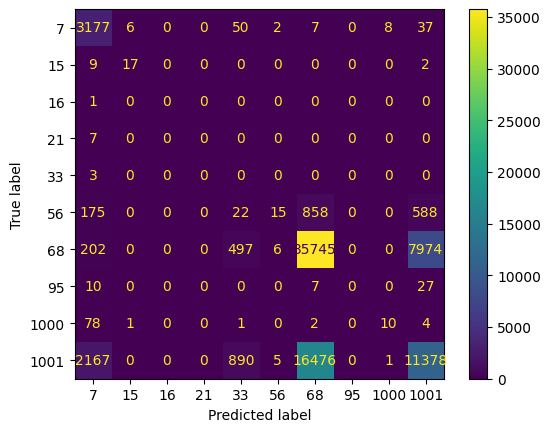

In [14]:
# Print confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

label_names = ['7', '15', '16', '21', '33', '56', '68', '95', '1000', '1001']

cm = confusion_matrix(y_real_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()
plt.show()